In [2]:
from os import listdir
from os.path import isfile, join
from os import walk,path,makedirs
import re
mypath = "./DogClassifier/"

In [26]:
#Run this cell to count no of images in each dog breed which helps in dividing images into train and validation set. class_index and class_inverted_index are of no use currently since i am learning labels from flow_from_directory.
from collections import Counter,defaultdict
files = []

for (dirpath, dirnames, filenames) in walk(mypath):
    #print(dirnames+filenames)
    files.extend(filenames)
        
dognames=[i.rsplit('_',1)[0] for i in files if 'DS' not in i]
items=0
class_inverted_index=dict()
class_index=dict()
class_counts=dict(Counter(dognames))
classes=set(list(class_counts.keys()))
for index,classname in enumerate(classes):
    class_index[classname]=index
    class_inverted_index[index]=classname

print(class_index)
print(class_counts)
print(class_inverted_index)
    

{'Italian_greyhound': 0, 'Affenpinscher': 1, 'Beagle': 2, 'Field_spaniel': 3, 'Boston_terrier': 4, 'Dachshund': 5, 'Bichon_frise': 6, 'Neapolitan_mastiff': 7, 'Boykin_spaniel': 8, 'Great_pyrenees': 9, 'Dandie_dinmont_terrier': 10, 'Icelandic_sheepdog': 11, 'Pharaoh_hound': 12, 'American_foxhound': 13, 'Greyhound': 14, 'Manchester_terrier': 15, 'Otterhound': 16, 'Plott': 17, 'American_eskimo_dog': 18, 'French_bulldog': 19, 'Welsh_springer_spaniel': 20, 'Ibizan_hound': 21, 'Basset_hound': 22, 'Leonberger': 23, 'Bloodhound': 24, 'Collie': 25, 'Bull_terrier': 26, 'Clumber_spaniel': 27, 'Bullmastiff': 28, 'Lakeland_terrier': 29, 'Yorkshire_terrier': 30, 'Silky_terrier': 31, 'German_shorthaired_pointer': 32, 'Airedale_terrier': 33, 'Bearded_collie': 34, 'Canaan_dog': 35, 'English_springer_spaniel': 36, 'German_wirehaired_pointer': 37, 'Boxer': 38, 'Norfolk_terrier': 39, 'Greater_swiss_mountain_dog': 40, 'Cane_corso': 41, 'Pembroke_welsh_corgi': 42, 'Bedlington_terrier': 43, 'Glen_of_imaal_te

In [3]:
#Write index , counts and inverted index to respective files

import json
import os.path

if  not os.path.isfile('./class_index.json'):
    with open('class_index.json', 'w') as fp:
        json.dump(class_index, fp)

if not os.path.isfile('./class_counts.json'):
    with open('class_counts.json', 'w') as fp:
        json.dump(class_counts, fp)

if not os.path.isfile('./class_inverted_index.json'):   
    with open('class_inverted_index.json', 'w') as fp:
        json.dump(class_inverted_index, fp)



In [4]:
with open('class_index.json', 'r') as fp:
    class_index = dict(json.load(fp))
    
with open('class_counts.json', 'r') as fp:
    class_counts = dict(json.load(fp))
    
with open('class_inverted_index.json', 'r') as fp:
    class_inverted_index = dict(json.load(fp))


In [40]:
#Transfer files from respective dog_breed folders to their train and validation class
import cv2
training_images=[]
training_labels=[]
validation_images=[]
validation_labels=[]
train_dir="./train/"
val_dir="./val/"
size=224

train_dogbreeds=class_counts.copy()
train_dogbreeds.update((x,int(y*0.8)) for x,y in train_dogbreeds.items())


validation_dogbreeds = {key: class_counts[key] - train_dogbreeds.get(key, 0) for key in class_counts.keys()}
#print(class_counts)
#print(train_dogbreeds)
#print(validation_dogbreeds)

train_transfer={key:0 for key in class_counts.keys()}
validation_transfer={key:0 for key in class_counts.keys()}


for (dirpath, dirnames, filenames) in walk(mypath):
    #print(dirnames+filenames)
    files.extend(filenames)
    for file in filenames:
        dog_breed=file.rsplit('_',1)[0]
        if "DS" in dog_breed:
            continue
        #print(path.join(dirpath,file))
        image=cv2.imread(path.join(dirpath,file))
        #image = cv2.imread(dirpath+file,cv2.IMREAD_COLOR)
        #cv2.imshow('image',cv2.imread(path.join(dirpath,file)))
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        #transfer
        if(train_dogbreeds[dog_breed]-train_transfer[dog_breed]!=0):
            #make train transfer
            
            train_transfer[dog_breed]+=1
            #print(train_transfer[dog_breed])
            #training_images.append(image)
            #training_labels.append(class_index[dog_breed])
            path_=train_dir+dog_breed+"/"
            if(not os.path.exists(train_dir+dog_breed)):
                os.makedirs(path_)
            cv2.imwrite(path_+dog_breed+"_"+str(train_transfer[dog_breed]) + ".jpg", image)
        else:
            #make validation transfer
            validation_transfer[dog_breed]+=1
            #validation_images.append(image)
            #validation_labels.append(class_index[dog_breed])
            path_=val_dir+dog_breed+"/"
            if(not os.path.exists(val_dir+dog_breed)):
                os.makedirs(path_)
            cv2.imwrite(path_+dog_breed+"_"+str(validation_transfer[dog_breed]) + ".jpg", image)
            
print("Completed")
            
        

Completed


In [41]:
#import numpy as np
#np.savez('dogs_classifier_training_data.npz', np.array(training_images))
#np.savez('dogs_classifier_training_labels.npz', np.array(training_labels))
#np.savez('dogs_classifier_test_data.npz', np.array(validation_images))
#np.savez('dogs_classifier_test_labels.npz', np.array(validation_labels))

In [6]:
'''
import numpy as np
def load_data_training_and_test(datasetname):
    
    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']

    return (train, train_labels), (test, test_labels)'''

In [21]:
#for i in range(1,11):
#    random = np.random.randint(0, len(training_images))
#    cv2.imshow("image_"+str(i), training_images[random])
#    print(str(i)+" "+class_inverted_index[str(training_labels[random])])
#    cv2.waitKey(0)
    
#cv2.destroyAllWindows()

In [8]:
'''
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = load_data_training_and_test("dogs_classifier")
# Reshaping our label data from (2000,) to (2000,1) and test data from (1000,) to (1000,1)
y_train = to_categorical(y_train.reshape(y_train.shape[0], 1))
y_test = to_categorical(y_test.reshape(y_test.shape[0], 1))

# Change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)'''

/Users/manasranjanmahanta/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(6625, 224, 224, 3)
(6625, 133)
(1726, 224, 224, 3)
(1726, 133)


In [9]:
#Load MobileNet with top layers removed
from keras.applications import MobileNet

# MobileNet was designed to work on 224 x 224 pixel input images sizes
img_rows, img_cols = 224, 224 

# Re-loads the MobileNet model without the top or FC layers
MobileNet = MobileNet(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in MobileNet.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(MobileNet.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 Activation False
4 DepthwiseConv2D False
5 BatchNormalization False
6 Activation False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 DepthwiseConv2D False
11 BatchNormalization False
12 Activation False
13 Conv2D False
14 BatchNormalization False
15 Activation False
16 DepthwiseConv2D False
17 BatchNormalization False
18 Activation False
19 Conv2D False
20 BatchNormalization False
21 Activation False
22 DepthwiseConv2D False
23 BatchNormalization False
24 Activation False
25 Conv2D False
26 BatchNormalization False
27 Activation False
28 DepthwiseConv2D False
29 BatchNormalization False
30 Activation False
31 Conv2D False
32 BatchNormalization False
33 Activation False
34 DepthwiseConv2D False
35 BatchNormalization False
36 Activation False
37 Conv2D False
38 BatchNormalization False
39 Activation False
40 DepthwiseConv2D False
41 BatchNormalization False
42 Activation False
43 Conv2D False
44 BatchNormali

In [10]:
#Add our own layers on top of mobileNet
def addTopModelMobileNet(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [11]:
#Summarizes the final model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

num_classes = 133

FC_Head = addTopModelMobileNet(MobileNet, num_classes)

model = Model(inputs = MobileNet.input, outputs = FC_Head)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 32)      0         
__________

In [13]:
#Run this cell to augment the images for both train and validation folder 

from keras.preprocessing.image import ImageDataGenerator

train_data_dir = './train'
validation_data_dir = './val'

# Do some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# set our batch size (typically on most mid tier systems we'll use 16-32)
batch_size = 32
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 6625 images belonging to 133 classes.
Found 1726 images belonging to 133 classes.


In [20]:
#Run this cell to dump labels and their index to labels.json
import json
import os.path

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
if  not os.path.isfile('./labels.json'):
    with open('labels.json', 'w') as fp:
        json.dump(labels, fp)


In [ ]:
print(list(train_generator.class_indices.keys()))

In [27]:
#Run this cell to train the model .If there is a already pre-trained model present in the directory it will load that model and start training 

import keras
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

from keras.utils.generic_utils import CustomObjectScope
import keras

if os.path.isfile('./dog_breed_mobileNet.h5'):
    with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
        model = load_model('./dog_breed_mobileNet.h5')
                     
checkpoint = ModelCheckpoint("./dog_breed_mobileNet.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1)

# Put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

# Enter the number of training and validation samples here
nb_train_samples = 6625
nb_validation_samples = 1726

# We only train 10 EPOCHS 
epochs = 10
batch_size = 16

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
414/414 [==============================] - 1737s 4s/step - loss: 1.0684 - acc: 0.7252 - val_loss: 1.3175 - val_acc: 0.7399

Epoch 00001: val_loss improved from inf to 1.31745, saving model to ./dog_breed_mobileNet.h5
Epoch 2/10
414/414 [==============================] - 1669s 4s/step - loss: 0.9960 - acc: 0.7344 - val_loss: 1.6373 - val_acc: 0.7243

Epoch 00002: val_loss did not improve
Epoch 3/10
414/414 [==============================] - 1618s 4s/step - loss: 1.0205 - acc: 0.7410 - val_loss: 1.3397 - val_acc: 0.7491

Epoch 00003: val_loss did not improve
Epoch 4/10
414/414 [==============================] - 1632s 4s/step - loss: 1.0383 - acc: 0.7311 - val_loss: 1.3716 - val_acc: 0.7442

Epoch 00004: val_loss did not improve
Epoch 00004: early stopping


In [28]:
#Run this cell after training model to get best model from checkpoint and load labels from labels.json file

import keras
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

from keras.utils.generic_utils import CustomObjectScope
import json
import keras
with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
    model = load_model('./dog_breed_mobileNet.h5')
    
with open('labels.json', 'r') as fp:
    labels = dict(json.load(fp))

In [31]:
#Run this cell to get random 10 images from validation set and see their predictions


import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join


def draw_test(name, pred, im):
    index=str(list(pred)[0])
   
    dog = labels[index]
    print("Predicted_Class "+dog)
    print('----------------------')
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 280, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, dog, (140, 160) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    #print(path_class)
    print("True Class - " + path_class)
    file_path = path + path_class
    #print(file_path)
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(0,10):
    input_im = getRandomImage("./val/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3) 
    
    # Get Prediction
    #print(model.predict(input_im, 1, verbose = 0))
    res = np.argmax(model.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

True Class - Boston_terrier
Predicted_Class Boston_terrier
----------------------
True Class - Newfoundland
Predicted_Class Newfoundland
----------------------
True Class - Yorkshire_terrier
Predicted_Class Silky_terrier
----------------------
True Class - French_bulldog
Predicted_Class French_bulldog
----------------------
True Class - Otterhound
Predicted_Class Dandie_dinmont_terrier
----------------------
True Class - Tibetan_mastiff
Predicted_Class Tibetan_mastiff
----------------------
True Class - American_water_spaniel
Predicted_Class American_water_spaniel
----------------------
True Class - Boston_terrier
Predicted_Class Boston_terrier
----------------------
True Class - Cocker_spaniel
Predicted_Class Cocker_spaniel
----------------------
True Class - Afghan_hound
Predicted_Class Afghan_hound
----------------------


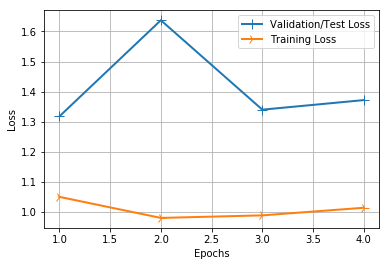

In [33]:
#i didn't run all epochs at one go due to conservative power of CPU . I saved the best model at various checkpoints and this is the accuracy of last set of epoch 


# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

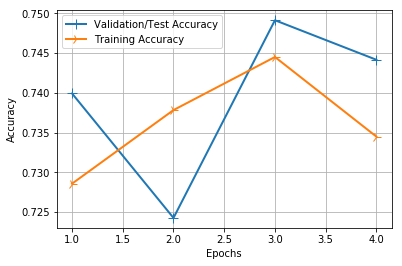

In [34]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


In [58]:
#Printing classification report and cofusion matrix

from keras.utils.generic_utils import CustomObjectScope
import json
import keras
with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
    model = load_model('./dog_breed_mobileNet.h5')
from sklearn.metrics import classification_report, confusion_matrix
nb_test_samples=1726
batch_size=32

test_data_dir='./test'

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)
#Confusion Matrix and Classification Report
Y_pred = model.predict_generator(test_generator, (nb_test_samples // batch_size)+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list((test_generator.class_indices.keys()))
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Found 1726 images belonging to 133 classes.
Confusion Matrix
[[14  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  1]]
Classification Report
                                    precision    recall  f1-score   support

                     Affenpinscher       0.88      0.88      0.88        16
                      Afghan_hound       0.78      0.93      0.85        15
                  Airedale_terrier       0.54      0.54      0.54        13
                             Akita       0.80      0.75      0.77        16
                  Alaskan_malamute       1.00      0.90      0.95        20
               American_eskimo_dog       1.00      0.94      0.97        16
                 American_foxhound       0.50      0.23      0.32        13
    American_staffordshire_terrier       0.83      0.88      0.86        17
            American_water_spaniel       0.29      0.22      0.25         9
